Confidential: Property of the Data Jedi Academy, unauthorised distribution not allowed

<img align="left" src = "DATA-JEDI logo.png" width="200" height="60">

# Model Tuning

## Introduction
After creating our machine learnng model, model tuning enables us refine and improve the performance of our model. We tune the model to provide results(model predicted values) that are closest to the expected actual as much as possible.

Different machine learning algorithms have different knobs & levers(i.e. hyperparameters) when properly tuned(adjusted & set) would improve the performance of the algorithms.  In several occasions the values of these hyperparameters 

This jupyter notebook demonstrates how  model tuning is achieved. Model tuning involves hypterparameter tuning.


## Content

1. Overview
2. Exploratory Data Analysis 
3. Data Split (training, validation, test)  versus Cross Validation   
4. Hyperparameter Tuning
5. Grid Search and Random Search
6. Conclusion  
7. Resources

## 1. Overview
Generally  in training a model data is splitted into two - training and test data set. The training dataset is used in training the model while the test is used to see how well the model generalises on data that was not used to train it.

How then do we tune our model?  
We need data to tune our model. We need to expose the model that we can use There are two basic high level general approach to achieved.  First warning, never use your test data to tune your model in any form. **<em>Never expose part of your test data to the model except to evaluate the result of your model</em>**.

The two approaches to use you data to tune your model are:
1. Splitting the data into Training, Validation and Testing data. *The validation data in this approach is used to tune the data*. 
2. Splitting the data into Training and Test data.  *You will then use Cross Validation on the training data tune your model*.

In [1]:
%matplotlib inline

# Python packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### 1.1 Sample Dataset 

#### Califonia Housing Dataset

Features description

1. longitude: *A measure of how far west a house is; a higher value is farther west*
2. latitude: *A measure of how far north a house is; a higher value is farther north*
3. housing_median_age: *Median age of a house within a block; a lower number is a newer building*
4. total_rooms: *Total number of rooms within a block*
5. total_bedrooms: *Total number of bedrooms within a block*
6. population: *Total number of people residing within a block*
7. households: *Total number of households, a group of people residing within a home unit, for a block*
8. median_income: *Median income for households within a block of houses (measured in tens of thousands of US Dollars)*
9. median_house_value: *Median house value for households within a block (measured in US Dollars)*
10. ocean_proximity: *Location of the house w.r.t ocean/sea*

Data Source:
[Kaggle - Califonia Housing Price](https://www.kaggle.com/camnugent/california-housing-prices)

In [2]:
califonia = pd.read_csv("Model Tuning/data/housing.csv", )
califonia.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
califonia.shape  #the dimension of the dataset

(20640, 10)

### 1.2 Notebook objectives
The objective in this notebook is to demonstrate how to do model tuning. We will not be doing a detailed exploratory data analysis. However in practice it is important you do a detailed exploratory data analysis before proceeding to building a model and refining your model through model tuning.  

You may wish to consult the module on exploratory data analysis  to learn how to do an extensive exploratory data analysis on your dataset.

**In this notebook, the primary objective is to build a model predicts the median house price from dataset provided.**

## 2. Exploratory Data Analysis 

In [4]:
califonia.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
califonia.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [6]:
califonia.info()  #description of data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


From output of califonia.info() we will observe that the *total_bedrooms* features have missing values, while *ocean_proximity* feature though looks categorical from examining the top 5 and bottom 5 records is assigned an object type by pandas as default.  

We will need to consider converting *ocean_proximity* to an appropriate data type like category and keep in mind how we intend to handle the missing values in the *total_bedroom* feature.


In [7]:
# Summary statistics for numeric variables
califonia.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
#summary statistics for non numerica variables
califonia[['ocean_proximity']].describe(include="all")

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


### 2.1 Univariate Analysis

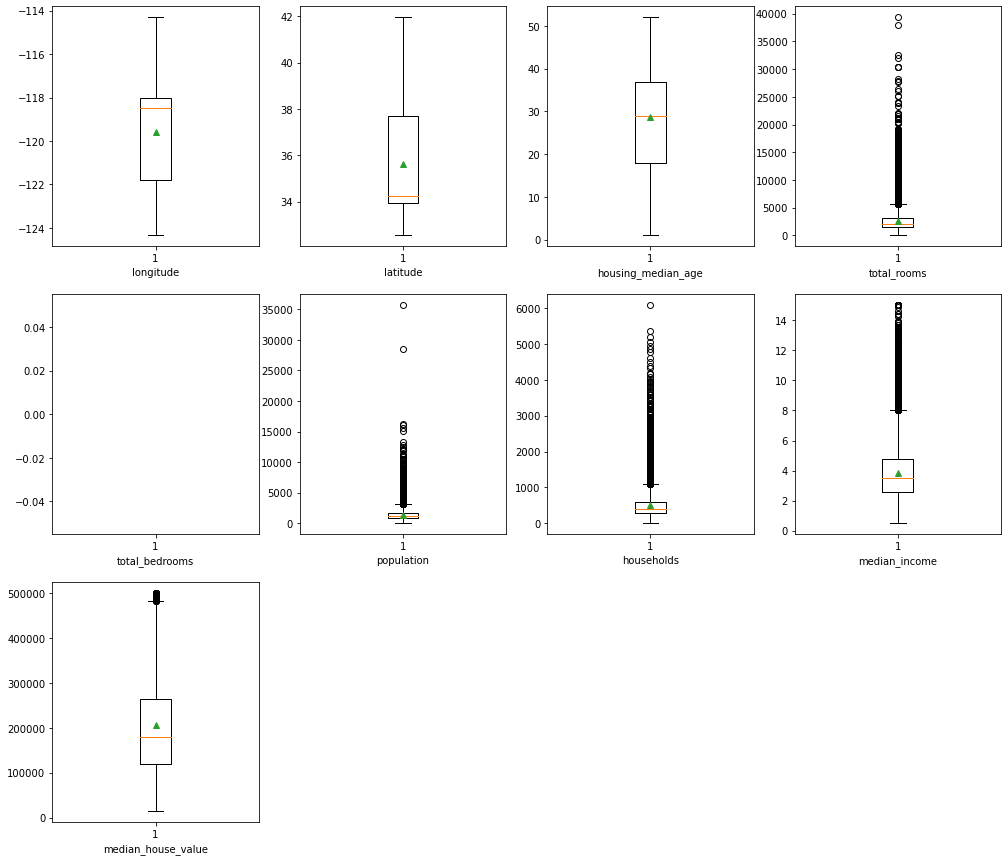

In [9]:
n_rows = 3
n_cols = math.ceil(califonia.shape[1]/3)


numeric_columns = califonia.select_dtypes(include='number').columns.tolist()

# boxplot with mean shown 
plt.figure(figsize=(17,15))
for x in numeric_columns:
    plt.subplot(n_rows, n_cols,numeric_columns.index(x) +1 ,xlabel=x)
    plt.boxplot(califonia[x], showmeans=True, )
    
plt.show()

You will observe the following from the box plots:  
- *total_bedrooms* box plot is empty. This is because it contains missing value. We will need to first cater for the missing value before we can see the box plot.
- Aside from the *longitude*, *latitude* and *housing_median_age* all other features have a skewed distribution.  We will confirm this with a histogram plot.   

Lets look a little closer at the records we have missing values for *total_bedrooms*.   We will not handle the missing values now but we will generate the box_plot without the missing values.

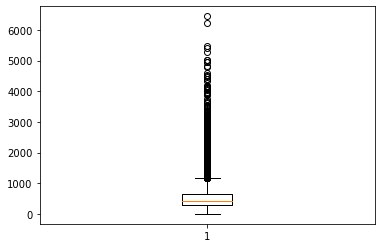

In [10]:
total_bedrooms_with_no_missing_values = califonia['total_bedrooms'][~califonia['total_bedrooms'].isna()]
plt.boxplot(total_bedrooms_with_no_missing_values);

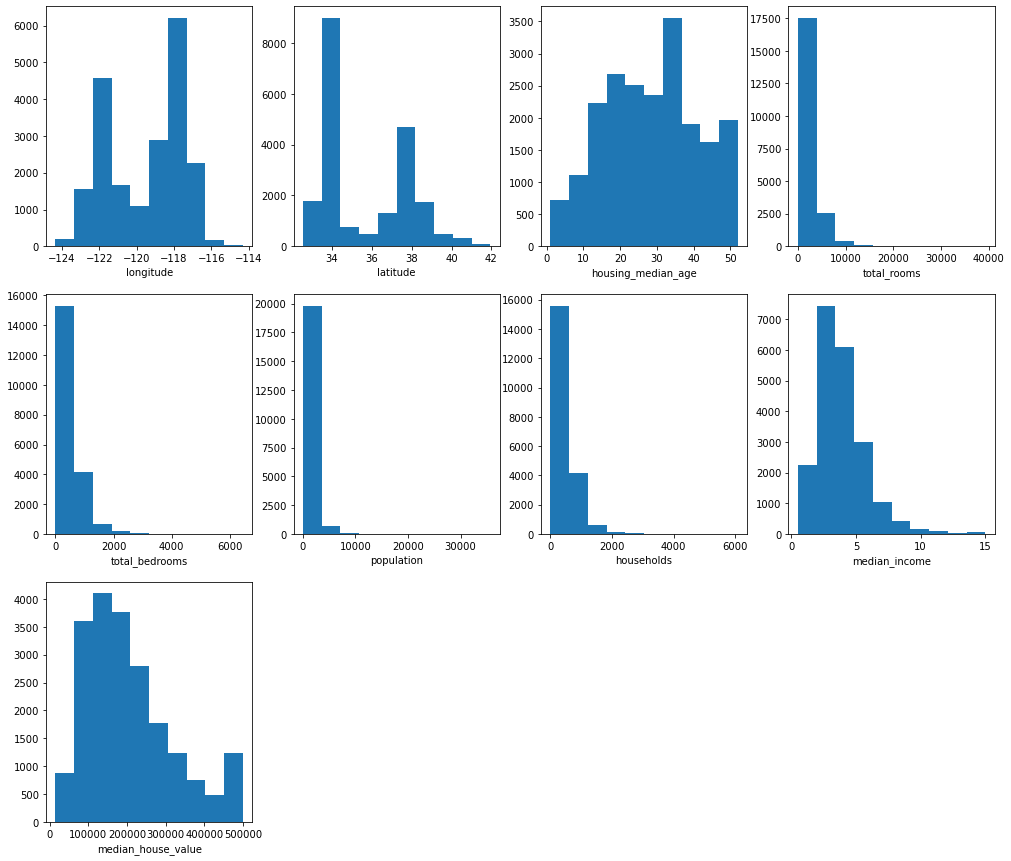

In [11]:
# histogram 
plt.figure(figsize=(17,15))
for x in numeric_columns:
    plt.subplot(n_rows, n_cols,numeric_columns.index(x) +1 ,xlabel=x)
    plt.hist(califonia[x])
    
plt.show()

The histogram plot confirms the skewed nature of our data

In [12]:
# non numeric variables 
califonia['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

<BarContainer object of 5 artists>

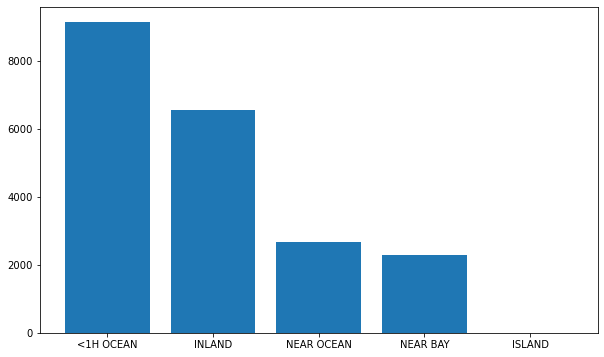

In [13]:
x= califonia['ocean_proximity'].value_counts()
plt.figure(figsize=(10,6))
plt.bar(x.index.tolist(), x,)

### 2.2 Bivariate Data Analysis 

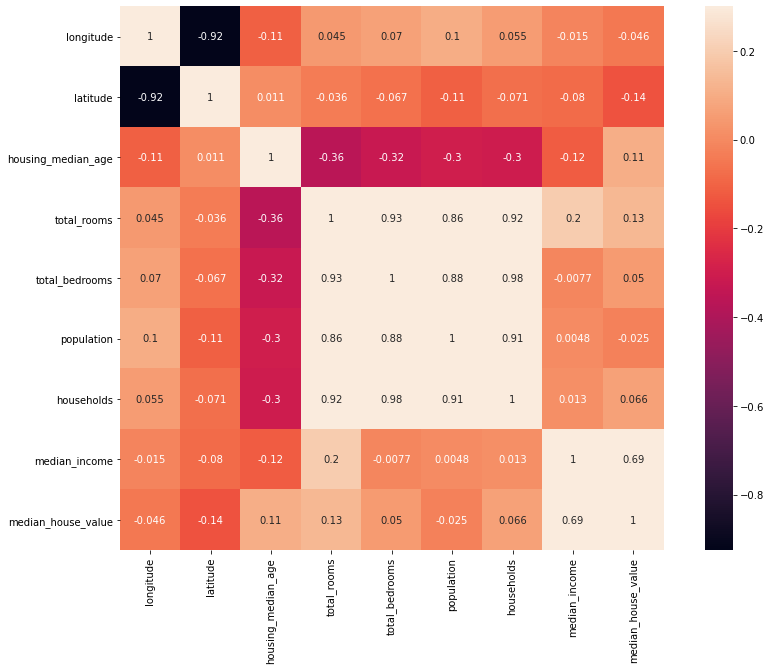

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(califonia.corr(), annot=True, vmax=.3, square=True);

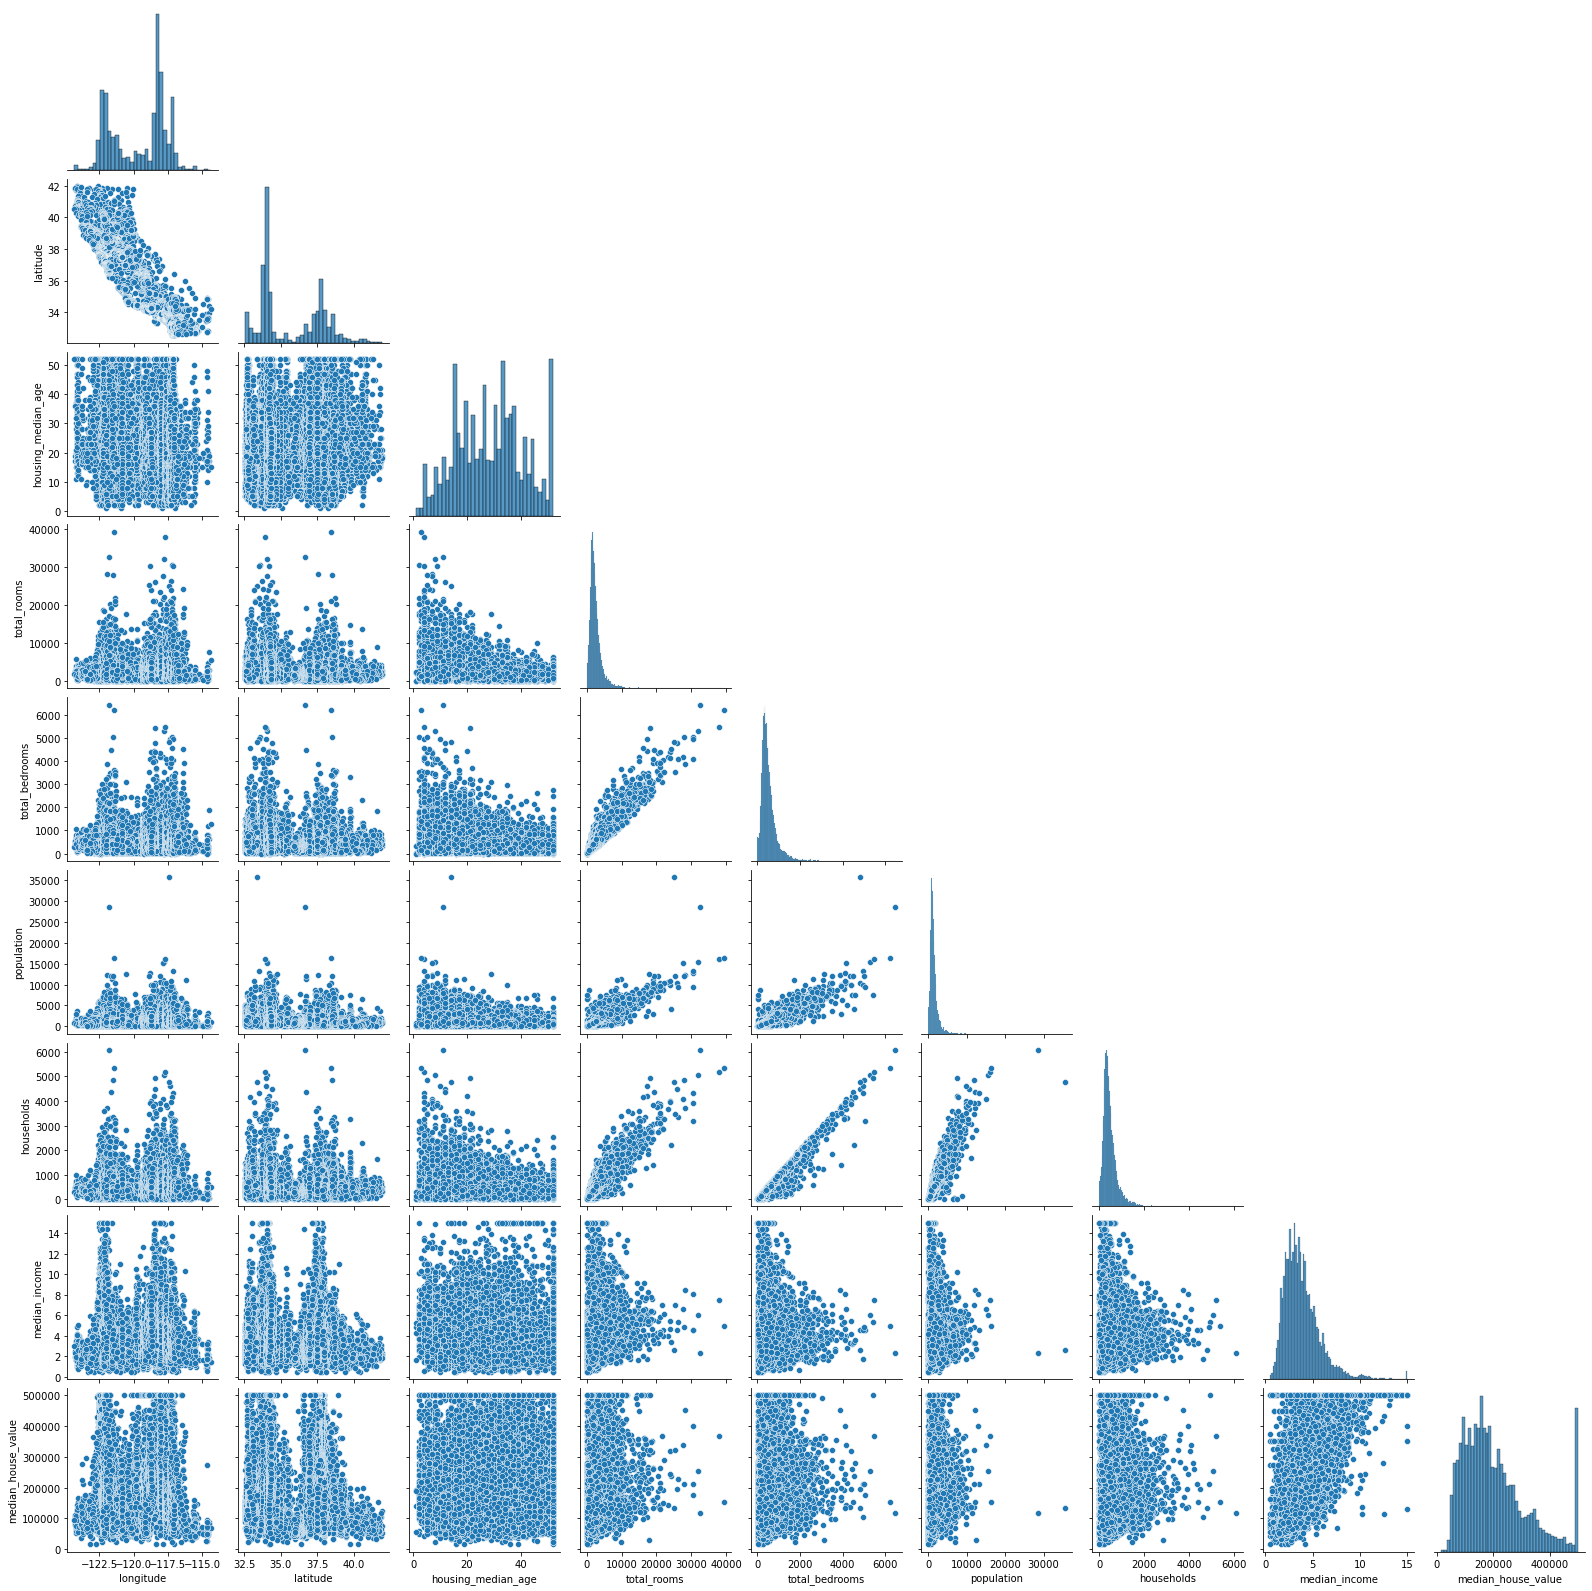

In [15]:
sns.pairplot(califonia,corner=True);

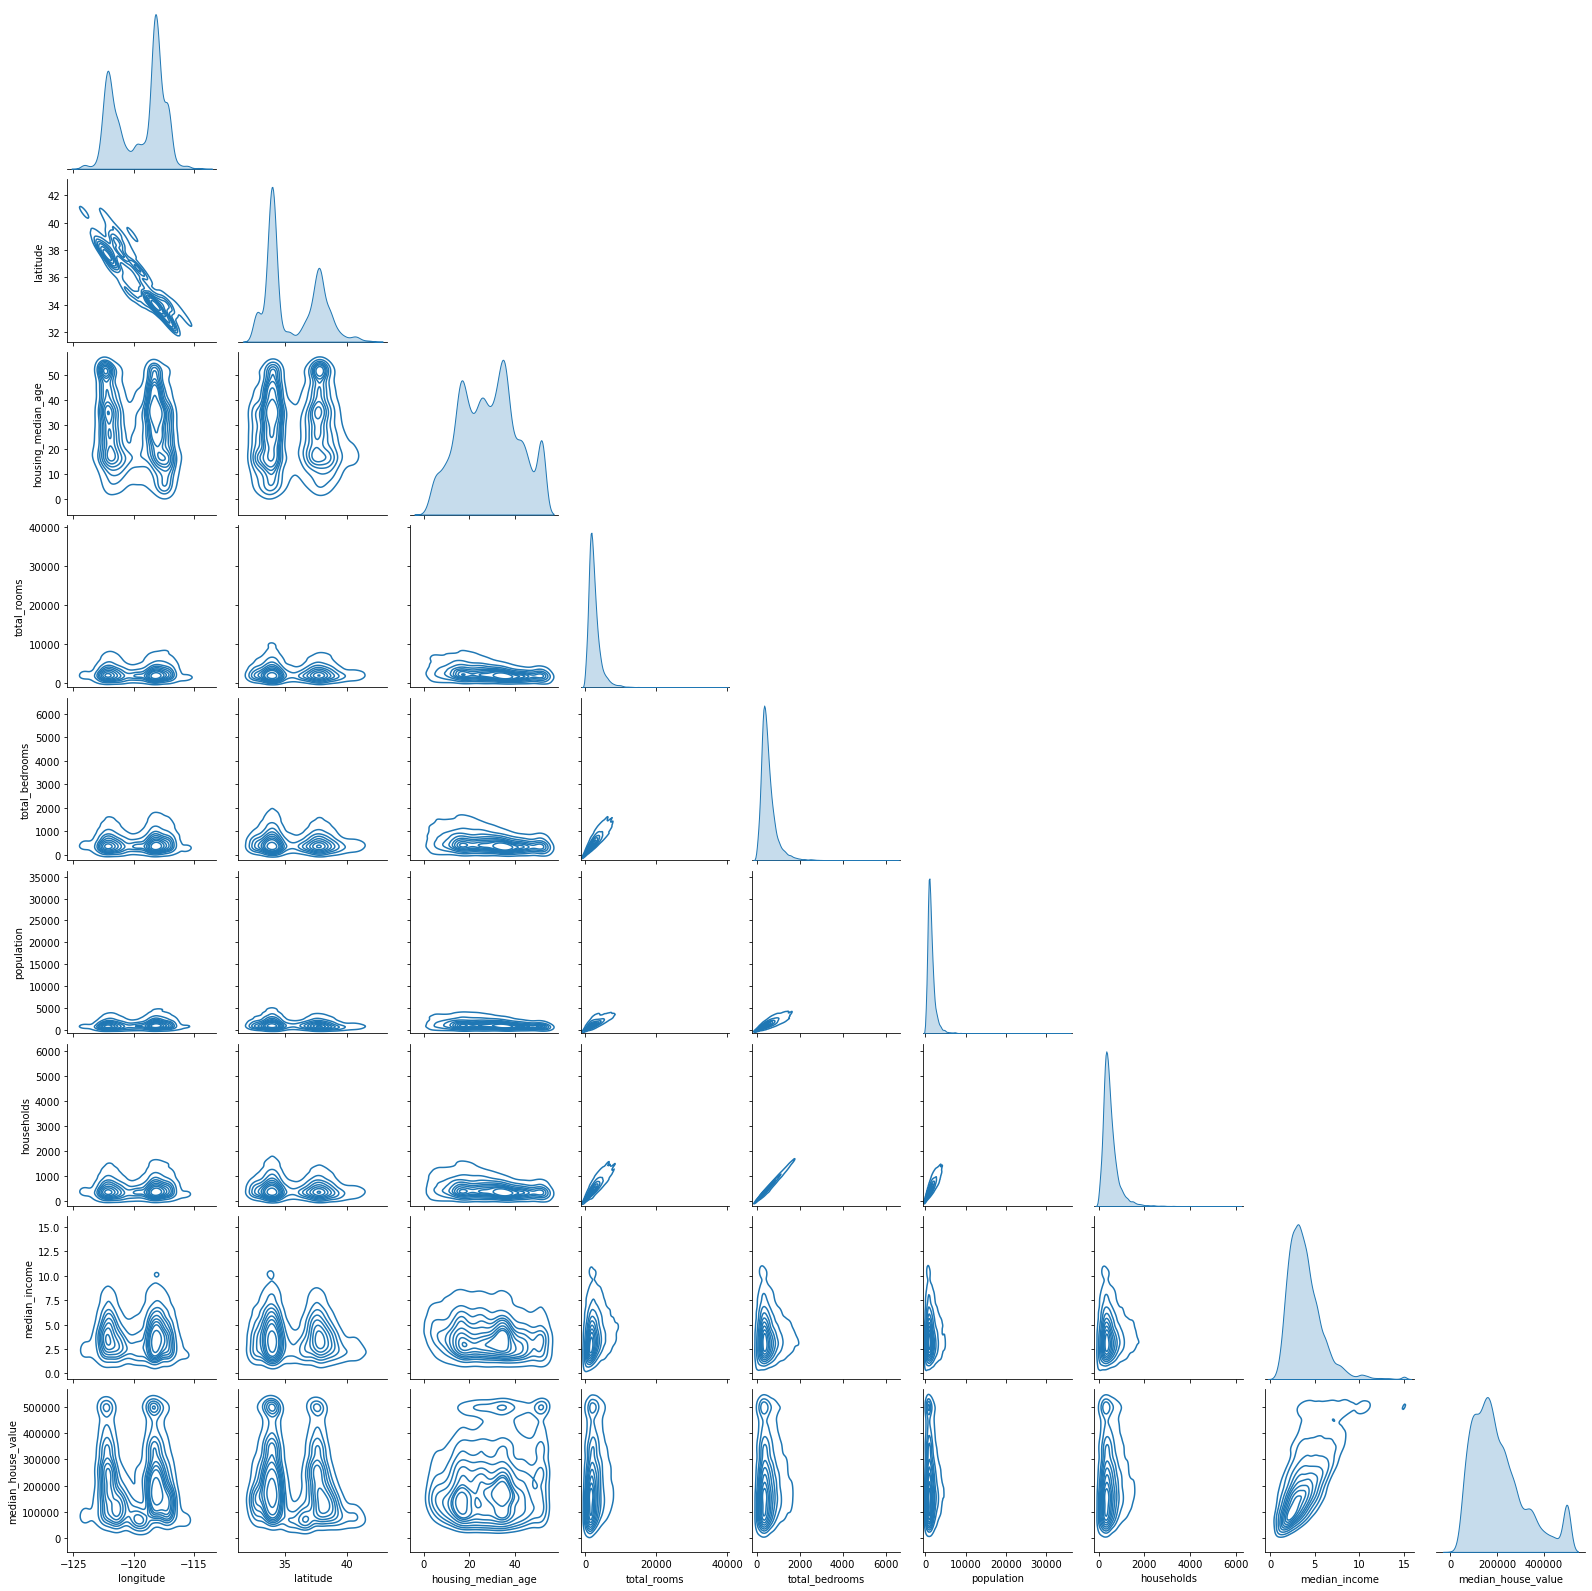

In [16]:
sns.pairplot(califonia,corner=True, kind='kde');

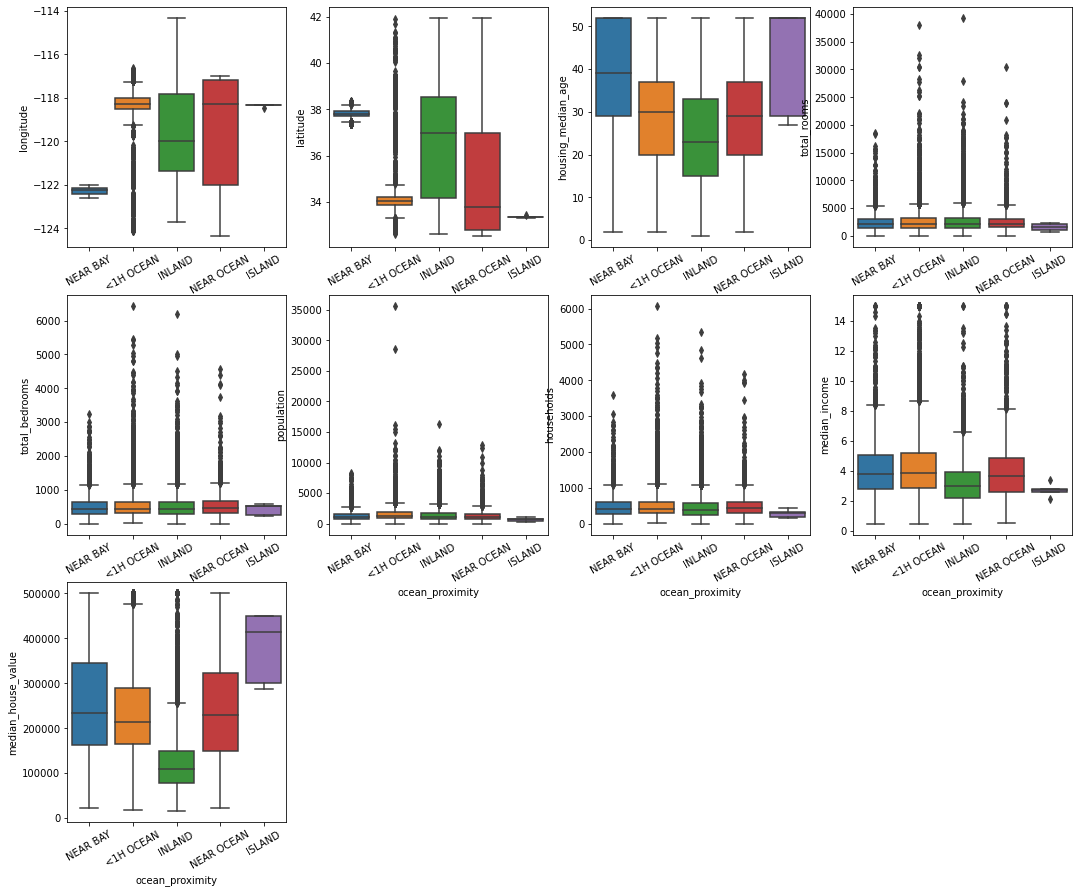

In [17]:
plt.figure(figsize=(18,15))
for y in numeric_columns:
    plt.subplot(n_rows, n_cols,numeric_columns.index(y) +1 )
    plt.xticks(rotation = 30)
    sns.boxplot(y=y, x='ocean_proximity',data=califonia )
    
plt.show()

A lot of insight can be deduced from the box plot above.
E.g. the distribution of the median_house_value in terms of how close the house are to the ocean. Houses classified as island generally have the highest premium.  One can infer that those classified with the island category are on the average most expensive.

Note that for an actual project the data analysis done so far is not adequate. We could further extend the data analysis to a multivariate analysis where we are looking at the relationship that exist in more than two features.  

A simple strategy to achieve a mulitivariate analysis in a 2D plot is to use color coding or shapes to indicate the third feature.  Some examples are shown below. 

### 2.3 Multivariate Data Analysis 

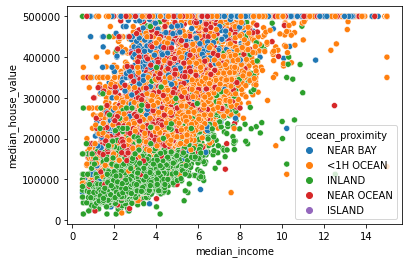

In [18]:
sns.scatterplot(y='median_house_value', x='median_income',hue='ocean_proximity', data=califonia, );

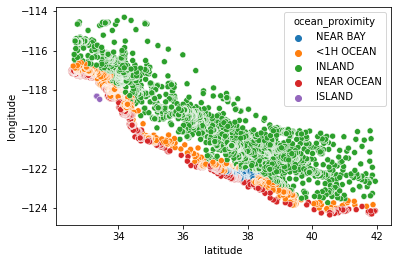

In [19]:
sns.scatterplot(y='longitude', x='latitude',hue='ocean_proximity', data=califonia, );

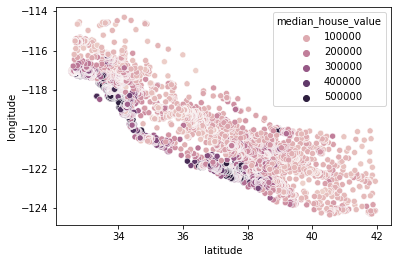

In [20]:
sns.scatterplot(y='longitude', x='latitude',hue='median_house_value', data=califonia, );

We need to do the following before we can progress to building a machine learning model
- handling missing values.  Most machine learning cannot handle missing values in a dataset.
- feature engineering requirement.  We will need to determine what feature engineering processes we need to apply to our dataset - numeric and categorical features. 
 - At a minimum numeric features need to be scaled. Refer to the jupyter notebook on feature engineering for more information on feature engineering.
 - transforming non-numeric (categorical) features  to numeric features using methods like one-hot encoding or label encoding.  Generally one-hot encoding is used for your features while label encoding is applied to the label data when the value you want to predict is not numeric. 

In this dataset, only one feature has a missing value. The *total_bedrooms*

### 2.4 Handling Missing Values

There are several approaches to handling missing values. You can see more details here [1](https://scikit-learn.org/stable/modules/impute.html), [2](https://machinelearningmastery.com/handle-missing-data-python/). 

We will use the k-Nearest Neighbors approach available in **KNNImputer** method in sklearn to  replace the mssing values with the median of the *total_bedrooms*.

NB- The strategy you follow for handling missing values will impact the performance of your model either negatively and possitively. It is important you think about the strategy you which to adopt carefully

In [21]:
from sklearn.impute import KNNImputer

# we will make use of some selected features to determine the value to assign

filter = ['total_bedrooms', 'housing_median_age', 'total_rooms', 'population', 'households', 'median_income']
data_filtered = califonia.loc[:,filter]

imputer = KNNImputer(n_neighbors=6, )
imputer_data = imputer.fit_transform(data_filtered)

#replace missing values in 'total_bedrooms'. We now have a new feature  'imp_total_bedrooms'  with no missing value
califonia['imp_total_bedrooms'] = imputer_data[:,0]

In [22]:
califonia.loc[:,['total_bedrooms','imp_total_bedrooms']].describe()

,total_bedrooms,imp_total_bedrooms
count,20433.000000,20640.000000
mean,537.870553,537.832219
std,421.385070,420.973332
min,1.000000,1.000000
25%,296.000000,295.958333
50%,435.000000,435.000000
75%,647.000000,647.000000
max,6445.000000,6445.000000


We can now drop total_bedrooms that has missing values and use imp_total_bedrooms instead. Since we have handled missing values in the feature

In [23]:
data = califonia.drop('total_bedrooms', axis=1)
data.head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity,imp_total_bedrooms
0,-122.23,37.88,41.0,880.0,322.0,126.0,8.3252,452600.0,NEAR BAY,129.0
1,-122.22,37.86,21.0,7099.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1106.0
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0,NEAR BAY,190.0
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0,NEAR BAY,235.0
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0,NEAR BAY,280.0


### 2.5 Feature Engineering

#### 2.5.1 Handling Categorical Variable 

We have only one categorical feature - *ocean_proximity*.  Being a feature (independent variable) and not a label (dependent variable) we will apply one-hot encoding.  pandas as the get_dummies method enables us encode  the categorical variable.

In [35]:
data_transformed = pd.get_dummies(data, ['ocean_proximity'])
data_transformed.head() #ocean_proximity encoded

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,imp_total_bedrooms,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,322.0,126.0,8.3252,452600.0,129.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,2401.0,1138.0,8.3014,358500.0,1106.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0,190.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0,235.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0,280.0,0,0,0,1,0


#### 2.5.2 Scaling Features

Let's split our data into features(independent variables) and labels(dependent variable).

In [52]:
label_column = ['median_house_value'] # label
features_columns = [x for x in  data_transformed.columns if x != 'median_house_value'] #features 

In [53]:
y = data_transformed.loc[:,label_column]
X = data_transformed.loc[:, features_columns]

In [54]:
y.head()

,median_house_value
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0


In [55]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,imp_total_bedrooms,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,322.0,126.0,8.3252,129.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,2401.0,1138.0,8.3014,1106.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,190.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,235.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,280.0,0,0,0,1,0


In [80]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

minmax = MinMaxScaler() # using the minmaxsaler
standard = StandardScaler()
X_transformed  = standard.fit_transform(X)
X_transformed 

array([[-1.32783522,  1.05254828,  0.98214266, ..., -0.01556621,
         2.83074203, -0.38446649],
       [-1.32284391,  1.04318455, -0.60701891, ..., -0.01556621,
         2.83074203, -0.38446649],
       [-1.33282653,  1.03850269,  1.85618152, ..., -0.01556621,
         2.83074203, -0.38446649],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ..., -0.01556621,
        -0.35326426, -0.38446649],
       [-0.87362627,  1.77823747, -0.84539315, ..., -0.01556621,
        -0.35326426, -0.38446649],
       [-0.83369581,  1.75014627, -1.00430931, ..., -0.01556621,
        -0.35326426, -0.38446649]])

## 3. Data Split (training, validation, test)  versus Cross Validation 

To effectively build our model from  our data and test that the model performs well. We need to split our data into a minimum of training and test data set.
The model is trained with the training dataset only and the test dataset only use to evaluate how well our model performs.  the test dataset must never be used to train or tune the dataset. One way to look at the test dataset, is to imagine that this is the dataset the model will be served when in production hence you should not build your model from this dataset in anyway.

To enable us tune our model, which really means refine the model by looking for the best combination of hyperparameters that returns the best performance, we need a validation dataset. The validation dataset is created from our training dataset. 

This implies we will have the following dataset split - training dataset, validation dataset, test dataset.  
In terms of percentage split the training dataset could be 80% of the entire data, while the test dataset will be 20%.
We then go further to split the training dataset into training dataset i.e. 80% of the training dataset, while the validation dataset will be 20% of the original trainining dataset.  

**What is wrong with this approach?**
- we may not have sufficient dataset to achieve these three split
- the validation dataset may be so small that is not a fairly good representation of the entire dataset.
- the training dataset may also become too small to be a fairly good representatin of the entire dataset.

**Cross Validation** comes to the rescue  
Rather than split the  dataset into three groups - training dataset, validation dataset and test dataset.**Cross validation** offers a better and more efficient approach.
With cross validation we only need to split the dataset into two groups - training & test. Cross validation will internally manage the validation within the training dataset. In its simplest form, the cross validation approach involves splitting into  training dataset into K groups (called K folds which you can specify, k refers to  the number of folds). The model is then trained with (K-1) folds and validated with 1 fold that was never part of the training dataset included in training the model. included in the training dataset. Cross validation repeats this K times using different combination of folds while validating with a fold that was never part of the training. More details on *cross validation* can be found [here](https://scikit-learn.org/stable/modules/cross_validation.html)

We will be using *cross validation* in this Jupyter notebook.

We will split the dataset into training & test dataset

In [81]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.8, random_state=42,)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 13), (4128, 13), (16512, 1), (4128, 1))

## 4. Hyperparameter Tuning

Before we can commence with model tuning, we need to have models so let's build some regression models that we intend to tune and improve their performance. To measure model performance we need to determine the metrics that will be used as the criteria. sklearn provides a means to specify the metric you want to measure. See [here](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring) for more details.

### 4.1 Model 

In [103]:
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.svm import LinearSVR

from sklearn.model_selection import cross_val_score

In [84]:
linear = LinearRegression()
linear_cv = cross_val_score(linear, X_train,y_train, cv=7, scoring='neg_root_mean_squared_error')
linear_cv 

array([-66439.4779621 , -70949.37366389, -65932.94396263, -68964.85649255,
       -66029.35354514, -69756.21268372, -72393.63376709])

In [95]:
ridge = Ridge(random_state=42, )
ridge_cv = cross_val_score(ridge, X_train,y_train, cv=7, scoring='neg_root_mean_squared_error')
ridge_cv

array([-66439.3609091 , -70940.39180689, -65932.9893331 , -68988.09288575,
       -65999.92446502, -69765.70523829, -72394.72836833])

In [89]:
svr = LinearSVR(random_state=42,)
svr_cv = cross_val_score(svr, X_train,np.ravel(y_train), cv=7, scoring='neg_root_mean_squared_error')
svr_cv

array([-93329.69930524, -96396.99087974, -90653.4277422 , -97094.53979954,
       -95573.25830261, -93531.70979448, -98682.85364294])

In [112]:
rf = RandomForestRegressor(random_state=42)
rf_cv = cross_val_score(rf, X_train,y_train, cv=7, scoring='neg_root_mean_squared_error')
rf_cv

array([-47368.36041343, -49719.97266896, -47991.84996541, -51301.71933693,
       -45876.16669787, -50624.41202992, -50169.39416467])

In [113]:
gbr = GradientBoostingRegressor(random_state=42)
gbr_cv = cross_val_score(gbr, X_train,y_train, cv=7, scoring='neg_root_mean_squared_error')
gbr_cv

array([-54014.48460882, -56833.20027123, -52771.5924228 , -56454.86020877,
       -51965.76301471, -56655.65955088, -56367.13566917])

In [120]:
clr = StackingRegressor(estimators=[('ridge',ridge),
                                     ('rf',rf), 
                                    ('svr',svr)], final_estimator=gbr)

clr_cv = cross_val_score(clr, X_train,np.ravel(y_train), cv=7, scoring='neg_root_mean_squared_error')
clr_cv

array([-47369.89307169, -49764.32240785, -48156.39927047, -51531.44421876,
       -45766.9653767 , -51026.47173867, -50271.72602538])

let's compare the performance of the different algorithms

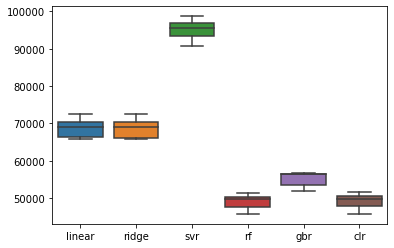

In [124]:
model_results = pd.DataFrame({'linear': linear_cv,
                              'ridge':ridge_cv,
                              'svr':svr_cv,
                               'rf':rf_cv,
                               'gbr':gbr_cv,
                               'clr':clr_cv})
#multiplied with -1 to convert neg_root_mean_squared_error to root_mean_squared_error
model_results = model_results * -1 

sns.boxplot(data=model_results);


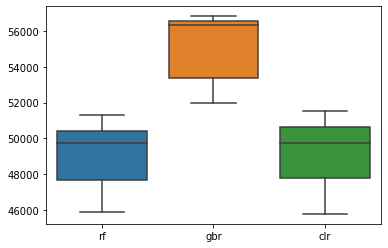

In [130]:
sns.boxplot(data=model_results.loc[:,['rf','gbr', 'clr']]);

In [129]:
model_results.loc[:,['rf','gbr', 'clr']].describe().T

,count,mean,std,min,25%,50%,75%,max
rf,7.0,49007.410754,1968.884371,45876.166698,47680.105189,49719.972669,50396.903097,51301.719337
gbr,7.0,55008.956535,2050.633374,51965.763015,53393.038516,56367.135669,56555.259880,56833.200271
clr,7.0,49126.746016,2098.620387,45766.965377,47763.146171,49764.322408,50649.098882,51531.444219


Given the performance of the algorithms, based on rmse (root mean squared error) random forest, rf. The next algorithm in terms of performance is the stacking algorithm which involved combining more than one algorithm. We could also consider this. However since the random forest model performs better and its is better we will progress with it. 

Let's now build a random forest model 

In [ ]:
from sklearn.metrics import mean_squared_error
rf = RandomForestRegressor(random_state = 42)

rf.fit(X_train, y_train)
y_train_predicted = rf.predict(X_train)

In [140]:
print( 'cross validation mean rmse:', rf_cv.mean() *-1) #multiplied with -1 to convert neg_root_mean_squared_error to root_mean_squared_error
print( 'test rmse:', mean_squared_error(y_test, rf.predict(X_test))**0.5)

cross validation mean rmse: 49007.41075388289
test rmse: 48946.67378677272


### 4.2 Hyperparameter Tuning
Let's see if we can find combinations of hyperparameters that we can tune to improve the performance of the model.  Different algorithms have different hyperparameters associated with them. We will need to identify the hyperparameters associated with Random Forest. Looking up the [sklearn documentation on Random Forest ](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) is one place to start and other available resources on the Internet.  What this implies the hyperparameters I have to tune for Support Vector Machine is different from that of Random Forest.  

We could manually start testing out different hyperparameter combinations however this will not be efficient. As a result we will leverage GridSearch or RandomSearch that allows specify a range of values for the hyperparameters we are tuning. GridSearch searches the entire search space while RandomSearch does a random combination of the hyperparameters possible values. RandomSearch is faster.

Here are additional resources on Tree based algorithms that will guide how define your hyperparameter range and provide best practices and challenges with using making use of Tree based algorithms:
- [Sklearn Decision Trees](https://scikit-learn.org/stable/modules/tree.html#minimal-cost-complexity-pruning)
- [Sklearn Random Forest Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)
- [Parameter Tuning for Random Forest](https://www.analyticsvidhya.com/blog/2020/03/beginners-guide-random-forest-hyperparameter-tuning/)
- [Pre-Pruning or Post-Pruning](https://towardsdatascience.com/pre-pruning-or-post-pruning-1dbc8be5cb14)

## 5. Grid Search and Random Search 

In [145]:
%%time

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

grid = { 'max_depth':range(1,20),
          'max_features':[1,2,3,4,5,6,7,10,11,12,13],
           'n_estimators':[100,150,200,250,300]           
}

rf = RandomForestRegressor(random_state=43, n_jobs=-1, criterion="mse")

# RandomizedSearchCV
rf_rsearch = RandomizedSearchCV(rf, grid, scoring='neg_root_mean_squared_error', cv=7)
rf_rsearch.fit(X_train, y_train)

RandomizedSearchCV(cv=7,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=43),
                   param_distributions={'max_depth': range(1, 20),
                                        'max_features': [1, 2, 3, 4, 5, 6, 7,
                                                         10, 11, 12, 13],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300]},
                   scoring='neg_root_mean_squared_error')

In [151]:
print( 'RandomSearchCV mean rmse:', rf_rsearch.best_score_ *-1) #multiplied with -1 to convert neg_root_mean_squared_error to root_mean_squared_error
print( 'test rmse:', mean_squared_error(y_test, rf_rsearch.predict(X_test))**0.5)
print('\nbest hyperparameters')
print(rf_rsearch.best_params_)

RandomSearchCV mean rmse: 48732.7342086243
test rmse: 48565.99713555112

best hyperparameters
{'n_estimators': 200, 'max_features': 7, 'max_depth': 18}


You will observe that by applying hyperparameter tunng we are able to improve on the training dataset rmse from 49007.41 to 48732.73. A similar improvement can be also been with the test dataset.

In [153]:
%time

# Grid Search - Note:this will take a long time to run 
rf_gsearch = GridSearchCV(rf, grid, scoring='neg_root_mean_squared_error', cv=7)
rf_gsearch.fit(X_train, y_train)

Wall time: 0 ns


GridSearchCV(cv=7, estimator=RandomForestRegressor(n_jobs=-1, random_state=43),
             param_grid={'max_depth': range(1, 20),
                         'max_features': [1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 13],
                         'n_estimators': [100, 150, 200, 250, 300]},
             scoring='neg_root_mean_squared_error')

In [ ]:
print( 'GridSearchCV mean rmse:', rf_gsearch.best_score_ *-1) #multiplied with -1 to convert neg_root_mean_squared_error to root_mean_squared_error
print( 'test rmse:', mean_squared_error(y_test, rf_gsearch.predict(X_test))**0.5)
print('\nbest hyperparameters')
print(rf_gsearch.best_params_)

## 5. Conclusion 
In summary, model tuning involves hyperparameter tuning. In which we seek to try out different values of hyperparameter for a specific algorithm to get the combinations that yield the best performance.  Sklearn provides also methods to achieve these. Strategies such as using cross validation enables carry out an effective validation of our model using the training dataset. 

## 6. Resources

Below are additional resources to further deepen your understanding and implementation of model tuning

a. [Model Performance Metrics - Regression & Classification](https://neptune.ai/blog/performance-metrics-in-machine-learning-complete-guide)  
b.[Hyperparameter Tuning in Python a Complete Guide 2020](https://neptune.ai/blog/hyperparameter-tuning-in-python-a-complete-guide-2020)  
c. [RandomSearchCV & GridSearchCV](https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/)  
d. [Tuning the Hyper-parameters of an estimator](https://scikit-learn.org/stable/modules/grid_search.html)  
e. [RandomSearchCV documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)  
f. [GridSearchCV documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)  
g. [AutoML libraries for Python](https://machinelearningmastery.com/automl-libraries-for-python/) 